# Loan calculator

Version 1.0

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [2]:
def PMT(c:int =1000, r:float=1.0, per:int=1, fper:int=1):
    """ Calculates the payment for a loan based on constant payments and a constant interest rate.
    Args:
        - Pv : Present Value (starting value of the loan)
        - r : Annual Percent Rate (APR)
        - fn : fraction of period of interest periods per year
        - n : number of years
    Returns:
        float: PMT value
    """
    nper = per * fper # number of periodic payment
    pir = r / fper # Periodic Interest Rate
    PMT = (c * pir) / (1 - (1 + pir)**(-nper))

    return -PMT



def IPMT(pmt:int, r:float, per:int, fper:int, c:int):    
    """Calculate IPMT
    Args:
        - c is PMT()
        - r is Annual Rate
        - per is Payment Number
        - pv is Present Value
    Returns:
        float: IPMT value
    """
     
    pir = r / fper # Periodic Interest Rate
    
    
    IPMT = -(pmt * ((1 + pir)**(per-1) - 1) / pir + c * (1 + pir)**(per-1)) * pir

    return IPMT


def PPMT(pmt:int, r:float, per:int, fper:int, c:int):
    """Calculate PPMT
    Args:
        - c is PMT()
        - r is Rate
        - per is Payment Number
        - pv is Present Value
    Returns:
        float: PPMT value
    """
    
    pir = r / fper # Periodic Interest Rate
    
    ppmt = pmt+(pmt * ((1 + pir)**(per-1) - 1) / pir + c * (1 + pir)**(per-1)) * pir

    return ppmt

## Global Variables

In [3]:
c1 = 100000
r1 = 0.0300
fper1 = 12
per1 = 25
n1 = 300

In [4]:
pmt1 = PMT(c=c1, r=r1, per=per1, fper=fper1 ) 
ipmt1 = IPMT(pmt=pmt1, r=r1, per=n1, fper=fper1, c=c1) 
ppmt1 = PPMT(pmt=pmt1, r=r1, per=n1, fper=fper1, c=c1) 

print( pmt1 )
print( ipmt1)
print( ppmt1 )

-474.21131385767984
-1.1825718550066087
-473.02874200267325


In [5]:
def amort_able(c:int, r:float, per:int, fper:int):
    """_summary_
    Args:
        Where c is PMT()
        Where r is Rate
        Where per is Payment Number
        Where pv is Present Value
    Returns:
        _type_: _description_
    """
    
    pmt = PMT(c=c, r=r, per=per, fper=fper ) 
    
    nper = per * fper # number of periodic payment
    
    list_per = []
    list_ipmt = []
    list_ppmt = []
    list_pmt = []
    
    for i in range(nper):
        
        ipmt = IPMT(pmt=pmt, r=r, per=i, fper=fper, c=c) 
        ppmt = PPMT(pmt=pmt, r=r, per=i, fper=fper, c=c) 
        
        list_per.append(i)
        list_ipmt.append(-ipmt)
        list_ppmt.append(-ppmt)
        list_pmt.append(-pmt)
    
    return list_per, list_ipmt, list_ppmt, list_pmt

In [30]:
list_per, list_ipmt, list_ppmt, list_pmt = amort_able(c=c1, r=r1, per=per1, fper=fper1)


print('Periodes : ', list_per[:10])
print('Mensualités : ', list_pmt[:10])
print('Part Intrêts : ', list_ipmt[:10])
print('Part capital : ', list_ppmt[:10])

Periodes :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Mensualités :  [474.21131385767984, 474.21131385767984, 474.21131385767984, 474.21131385767984, 474.21131385767984, 474.21131385767984, 474.21131385767984, 474.21131385767984, 474.21131385767984, 474.21131385767984]
Part Intrêts :  [250.55913045849795, 250.0, 249.43947171535584, 248.87754211, 248.31420768063086, 247.7494649151882, 247.18331029283198, 246.6157402839199, 246.04675134998553, 245.4763399437163]
Part capital :  [223.6521833991819, 224.21131385767984, 224.771842142324, 225.33377174767983, 225.89710617704898, 226.46184894249163, 227.02800356484786, 227.59557357375994, 228.1645625076943, 228.73497391396353]


In [33]:
def drawgraph(per:list, ipmt:list, ppmt:list, pmt:list):

    fig, ax = plt.subplots(figsize=(8,8))

    colors = ['#85c1e9', '#f8c471']
    per_max = int(max(per))
    pmt_max = int(np.sum(pmt))
    ipmt_max = int(np.round(np.sum(ipmt)))
    ppmt_max = int(np.round(np.sum(ppmt)))
    pmt_50 = int(np.round(pmt_max * 0.50 , 0))
    pmt_75 = int(np.round(pmt_max * 0.75 , 0))
    ipmt_75 = int(np.round(ipmt_max * 0.75 , 0))
    ppmt_75 = int(np.round(ppmt_max * 0.75 , 0))
    per_75 = int(np.round(per_max * 0.75 , 0))

    ax.plot(ipmt, label='interest', alpha=0.5, linewidth=4, color=colors[1])
    ax.plot(ppmt, label='capital', alpha=0.8, linewidth=4, color=colors[0])

    plt.xlabel('Periods')
    plt.ylabel('Amount')
    plt.legend()
    plt.title('Loan evolution')
    plt.show();
    
    return

def drawgraphcum(per:list, ipmt:list, ppmt:list, pmt:list):

    fig, ax = plt.subplots(figsize=(8,8))

    colors = ['#85c1e9', '#f8c471']
    per_max = int(max(per))
    pmt_max = int(np.sum(pmt))
    ipmt_max = int(np.round(np.sum(ipmt)))
    ppmt_max = int(np.round(np.sum(ppmt)))
    pmt_50 = int(np.round(pmt_max * 0.50 , 0))
    pmt_75 = int(np.round(pmt_max * 0.75 , 0))
    ipmt_75 = int(np.round(ipmt_max * 0.75 , 0))
    ppmt_75 = int(np.round(ppmt_max * 0.75 , 0))
    per_75 = int(np.round(per_max * 0.75 , 0))

    ax.fill_between(per, np.cumsum(pmt), label='interest', alpha=0.5, linewidth=4, color=colors[1])
    ax.fill_between(per, np.cumsum(ppmt), label='capital', alpha=0.8, linewidth=4, color=colors[0])

    ax.annotate('Capital', (per_75, ppmt_75), size=12, color='white', weight='bold', bbox=dict(boxstyle='round', color=colors[0], pad=0.6))
    ax.annotate('Interest', (per_75, pmt_75), size=12, color='white', weight='bold', bbox=dict(boxstyle='round', color=colors[1], pad=0.6))

    ax.axvline(x=150, color='#D3D3D3', linestyle='--')

    plt.xlabel('Periods')
    plt.ylabel('Amount')
    #plt.legend()
    plt.title('Loan evolution')
    plt.show();
    
    return



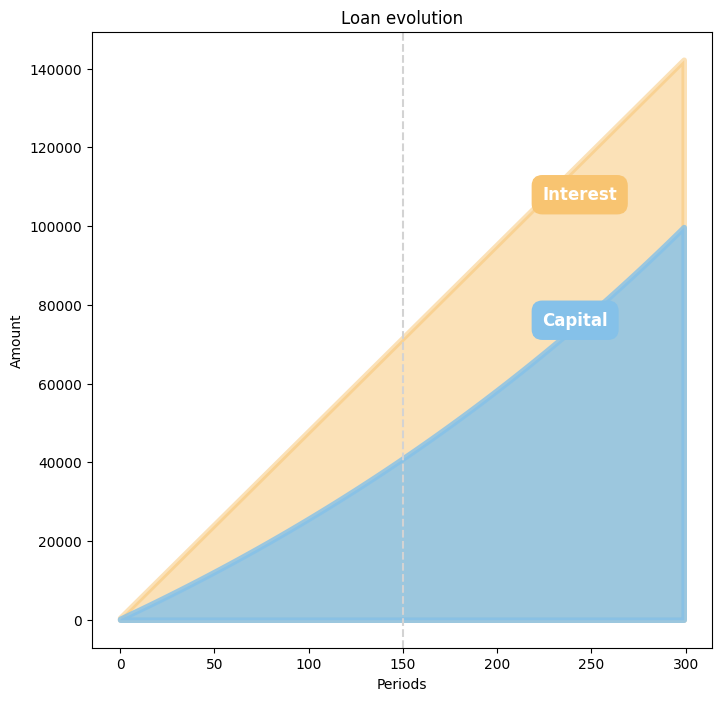

In [35]:
#drawgraph(per=list_per, ipmt=list_ipmt, ppmt=list_ppmt, pmt=list_pmt)
drawgraphcum(per=list_per, ipmt=list_ipmt, ppmt=list_ppmt, pmt=list_pmt)